### This script contains the following sections:

#### 1. Importing libraries and data 
#### 2. Variable selection
#### 3. Correlation check
#### 4. Scatterplots
#### 5. Pairplot of Dataset
#### 6. Categorical plot
#### 7. Revisiting Initial Questions
#### 8. Hypothesis

# 1. Imports

In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline
sns.set()

In [3]:
data_path = r'C:\Users\\data_emergency_ex6.1\Data'

In [4]:
df = pd.read_csv(os.path.join(data_path,'Prepared','3.data_join_facilities.csv'))
df.head()

,year,oshpd_id,county_number,county_name,facility_name,dba_address1,dba_city,dba_zip_code,license_category_desc,teaching_hospital_desc,...,medi_cal,medicare,other_payer,private_coverage,selfpay,all_other,english,spanish,ed_admit,ed_visit
0,2012,106010735,1,ALAMEDA,ALAMEDA HOSPITAL,2070 CLINTON,ALAMEDA,94501,General Acute Care,0.0,...,549.0,2740.0,3469.0,4339.0,0.0,522.0,12918.0,287.0,2595.0,13727.0
1,2012,106010739,1,ALAMEDA,ALTA BATES SUMMIT MEDICAL CENTER-ALTA BATES CA...,2450 ASHBY STREET,BERKELEY,94705,General Acute Care,0.0,...,8613.0,5707.0,1877.0,12926.0,0.0,534.0,33867.0,941.0,6047.0,35342.0
2,2012,106010776,1,ALAMEDA,CHILDRENS HOSPITAL AND RESEARCH CENTER AT OAKLAND,747 52ND STREET,OAKLAND,94609,General Acute Care,0.0,...,28489.0,19.0,1785.0,5949.0,0.0,1425.0,27285.0,10508.0,6911.0,39218.0
3,2012,106010805,1,ALAMEDA,EDEN MEDICAL CENTER,20103 LAKE CHABOT ROAD,CASTRO VALLEY,94546,General Acute Care,0.0,...,8543.0,6426.0,814.0,9169.0,0.0,666.0,29433.0,1632.0,6324.0,31731.0
4,2012,106010846,1,ALAMEDA,HIGHLAND HOSPITAL,1411 EAST 31ST STREET,OAKLAND,94602,General Acute Care,1.0,...,17877.0,4437.0,35836.0,1640.0,0.0,4025.0,57871.0,12306.0,8992.0,74202.0


In [5]:
df.describe()

,year,oshpd_id,county_number,dba_zip_code,teaching_hospital_desc,sex_male,sex_female,sex_unk,age_01_09,age_10_19,...,medi_cal,medicare,other_payer,private_coverage,selfpay,all_other,english,spanish,ed_admit,ed_visit
count,2891.000000,2.891000e+03,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,...,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2883.000000,2891.000000
mean,2015.973020,1.062811e+08,27.975095,93280.511588,0.091664,16794.628156,20026.150813,1.760291,4531.164649,3783.077482,...,14762.148737,6584.801107,1503.430301,10417.731581,2348.754410,734.071256,31578.028018,4495.252854,5906.326743,36822.541681
std,2.579792,1.374352e+05,13.741360,1808.382903,0.288601,11447.350003,13770.702081,3.993978,6055.692670,3134.600267,...,14563.439210,5256.993532,2980.582146,10248.816541,2603.047846,1069.149087,21419.574041,5608.454099,4749.263462,25007.452811
min,2012.000000,1.060107e+08,1.000000,90015.000000,0.000000,84.000000,80.000000,0.000000,0.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,164.000000
25%,2014.000000,1.061904e+08,19.000000,91942.000000,0.000000,8224.500000,9461.000000,0.000000,1308.000000,1633.500000,...,3939.000000,2785.500000,362.500000,3528.500000,208.500000,65.000000,15220.000000,774.000000,2223.500000,17596.500000
50%,2016.000000,1.063012e+08,30.000000,93274.000000,0.000000,14633.000000,17674.000000,0.000000,3043.000000,3087.000000,...,10356.000000,5498.000000,814.000000,7536.000000,1716.000000,292.000000,27679.000000,2547.000000,4985.000000,32585.000000
75%,2018.000000,1.063710e+08,37.000000,94954.000000,0.000000,23156.000000,27855.500000,2.000000,5898.000000,5165.500000,...,21118.000000,9063.000000,1459.500000,13735.500000,3449.000000,993.000000,43598.500000,5995.000000,8410.000000,51472.500000
max,2020.000000,1.065810e+08,58.000000,96161.000000,1.000000,70051.000000,80306.000000,58.000000,69077.000000,26364.000000,...,96576.000000,41467.000000,46254.000000,65373.000000,22360.000000,6828.000000,128465.000000,55149.000000,27937.000000,143619.000000


In [6]:
df.shape
# joined the main dataset with another recent dataset, thus the lower row count

(2891, 53)

In [7]:
print(df.columns.tolist())

['year', 'oshpd_id', 'county_number', 'county_name', 'facility_name', 'dba_address1', 'dba_city', 'dba_zip_code', 'license_category_desc', 'teaching_hospital_desc', 'licensed_bed_size', 'mssa_designation', 'er_service_level', 'sex_male', 'sex_female', 'sex_unk', 'age_01_09', 'age_10_19', 'age_20_29', 'age_30_39', 'age_40_49', 'age_50_59', 'age_60_69', 'age_70_79', 'age_80_', 'age_under_1', 'age_unknown', 'asian_pacific_island', 'black', 'hispanic', 'native_american_eski', 'other_race', 'unknown_race', 'white', 'acute_care', 'against_medical_advice', 'died', 'hospice_care', 'home_health_service', 'residential_care', 'routine', 'psychiatric_care', 'sn_ic_care', 'medi_cal', 'medicare', 'other_payer', 'private_coverage', 'selfpay', 'all_other', 'english', 'spanish', 'ed_admit', 'ed_visit']


# Step 2: Variable Selection for Exploratory Visual Analysis

In [8]:
excl_vars = ['year', 'oshpd_id','county_number','county_name', 'facility_name', 'dba_address1', 
             'dba_city', 'dba_zip_code', 'license_category_desc', 'teaching_hospital_desc', 'licensed_bed_size', 
             'mssa_designation', 'er_service_level', 'sex_male', 'sex_female', 'sex_unk', 'age_01_09', 'age_10_19', 'age_20_29', 'age_30_39', 'age_40_49',
             'age_50_59', 'age_60_69', 'age_70_79', 'age_80_', 'age_under_1', 'age_unknown','medi_cal', 'medicare', 'other_payer', 
             'private_coverage', 'selfpay', 'all_other']

df_s = df[[col for col in df.columns if col not in excl_vars]]
df_s.head()

,asian_pacific_island,black,hispanic,native_american_eski,other_race,unknown_race,white,acute_care,against_medical_advice,died,hospice_care,home_health_service,residential_care,routine,psychiatric_care,sn_ic_care,english,spanish,ed_admit,ed_visit
0,1335.0,3025.0,173.0,9.0,2762.0,372.0,6051.0,237.0,385.0,39.0,12.0,23.0,10.0,12462.0,210.0,201.0,12918.0,287.0,2595.0,13727.0
1,2385.0,12662.0,3419.0,55.0,2523.0,190.0,14108.0,198.0,242.0,25.0,0.0,3.0,44.0,33653.0,934.0,156.0,33867.0,941.0,6047.0,35342.0
2,2078.0,12165.0,15489.0,39.0,5815.0,322.0,3310.0,308.0,758.0,9.0,0.0,0.0,0.0,38135.0,0.0,0.0,27285.0,10508.0,6911.0,39218.0
3,2098.0,6645.0,7036.0,100.0,868.0,28.0,14956.0,1064.0,332.0,100.0,26.0,62.0,2.0,29049.0,695.0,50.0,29433.0,1632.0,6324.0,31731.0
4,5450.0,31470.0,20596.0,248.0,6247.0,196.0,9995.0,1936.0,567.0,161.0,0.0,2.0,1.0,70104.0,0.0,143.0,57871.0,12306.0,8992.0,74202.0


# Step 3. Correlation Matrix Creation

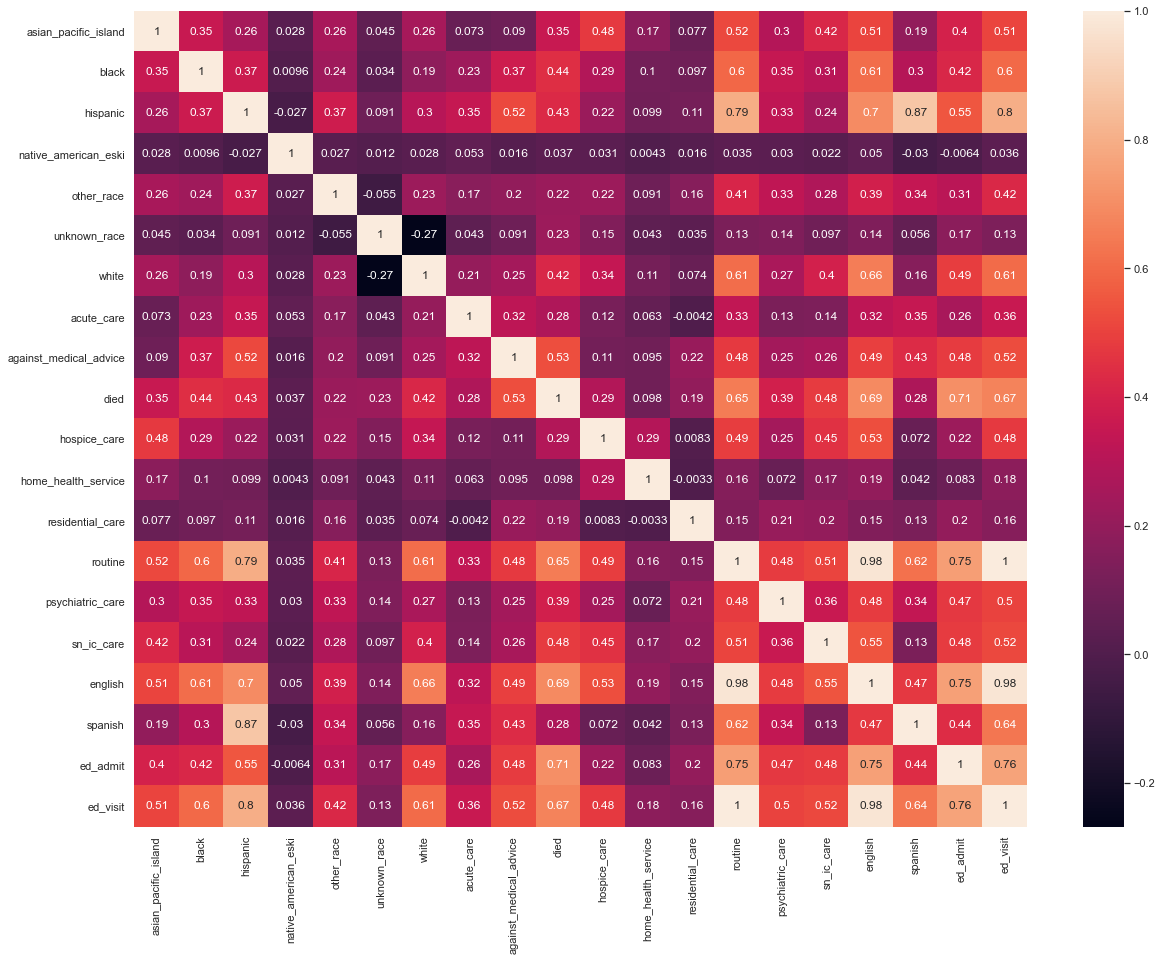

In [9]:
# create subplot
f,ax = plt.subplots(figsize = (20,15))

#add a plotted heatmap layer over the subplot
corr = sns.heatmap(df_s.corr(), annot = True, ax = ax) 

**Comments on above chart based on race group** Note that *disposition* means discharge outcome of patient who visited the ED

On a facility level, asian patients show a moderate association with the dispositions relating to death($r^2$ = 0.35), hospice care ($r^2$ = 0.48) and specialized nursing care (sn_ic_care, $r^2$ = 0.42). A moderate to strong association was found for the rountine disposition ($r^2$ = 0.52)</br>


Stronger associations relating to death and routine dispositions were found for black($r^2$ = 0.44, $r^2$ = 0.6) and hispanic($r^2$ = 0.43, $r^2$ = 0.79) patients.

A moderate to strong association was found for hispanic patients who where discharged against medical advice (($r^2$ = 0.52).

Black (($r^2$ = 0.6), hispanic (($r^2$ = 0.8) and white (($r^2$ = 0.6) patient groups were found to have strong associations with ED visits. 



# Step 4: Scatterplots showing variables with the strongest associations

#### Race vs ED visits

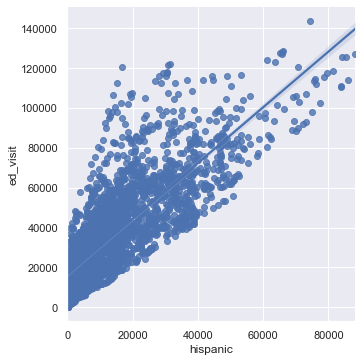

In [10]:
sns.lmplot(x = 'hispanic', y = 'ed_visit', data = df) #hue = 'mssa_designation'

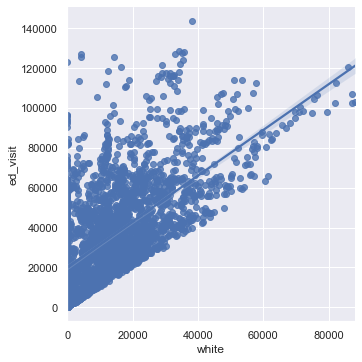

In [11]:
sns.lmplot(x = 'white', y = 'ed_visit', data = df)

**Comment**

There is a stronger linear relationship between hispanic patient and ED visits when compare to white patients.

#### Race vs Dispositions

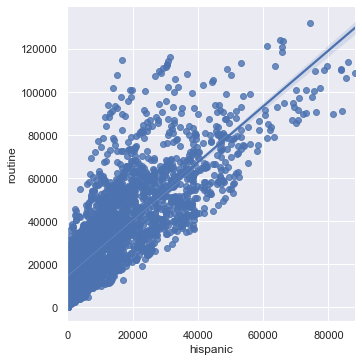

In [12]:
sns.lmplot(x = 'hispanic', y = 'routine', data = df)

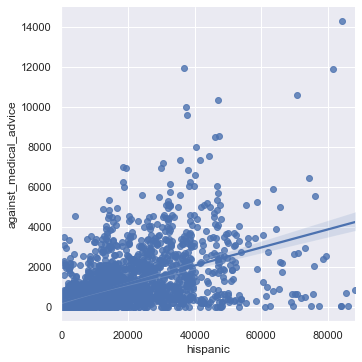

In [13]:
sns.lmplot(x = 'hispanic', y = 'against_medical_advice', data = df)

**Comment**

A strong linear relationship exists between hispanic patients and routine dispositions as opposed dispositions against medical advice. 

# Step 5: Pairplot of Entire Dataset

In [14]:
print(df.columns)

Index(['year', 'oshpd_id', 'county_number', 'county_name', 'facility_name',
       'dba_address1', 'dba_city', 'dba_zip_code', 'license_category_desc',
       'teaching_hospital_desc', 'licensed_bed_size', 'mssa_designation',
       'er_service_level', 'sex_male', 'sex_female', 'sex_unk', 'age_01_09',
       'age_10_19', 'age_20_29', 'age_30_39', 'age_40_49', 'age_50_59',
       'age_60_69', 'age_70_79', 'age_80_', 'age_under_1', 'age_unknown',
       'asian_pacific_island', 'black', 'hispanic', 'native_american_eski',
       'other_race', 'unknown_race', 'white', 'acute_care',
       'against_medical_advice', 'died', 'hospice_care', 'home_health_service',
       'residential_care', 'routine', 'psychiatric_care', 'sn_ic_care',
       'medi_cal', 'medicare', 'other_payer', 'private_coverage', 'selfpay',
       'all_other', 'english', 'spanish', 'ed_admit', 'ed_visit'],
      dtype='object')


In [15]:
#Due to high data dimensionality, I selected a few columns for pairplot visualization

# using race groups and dispoitions

cols = ['black', 'hispanic','white','asian_pacific_island','against_medical_advice','died', 'routine','ed_visit','ed_admit']

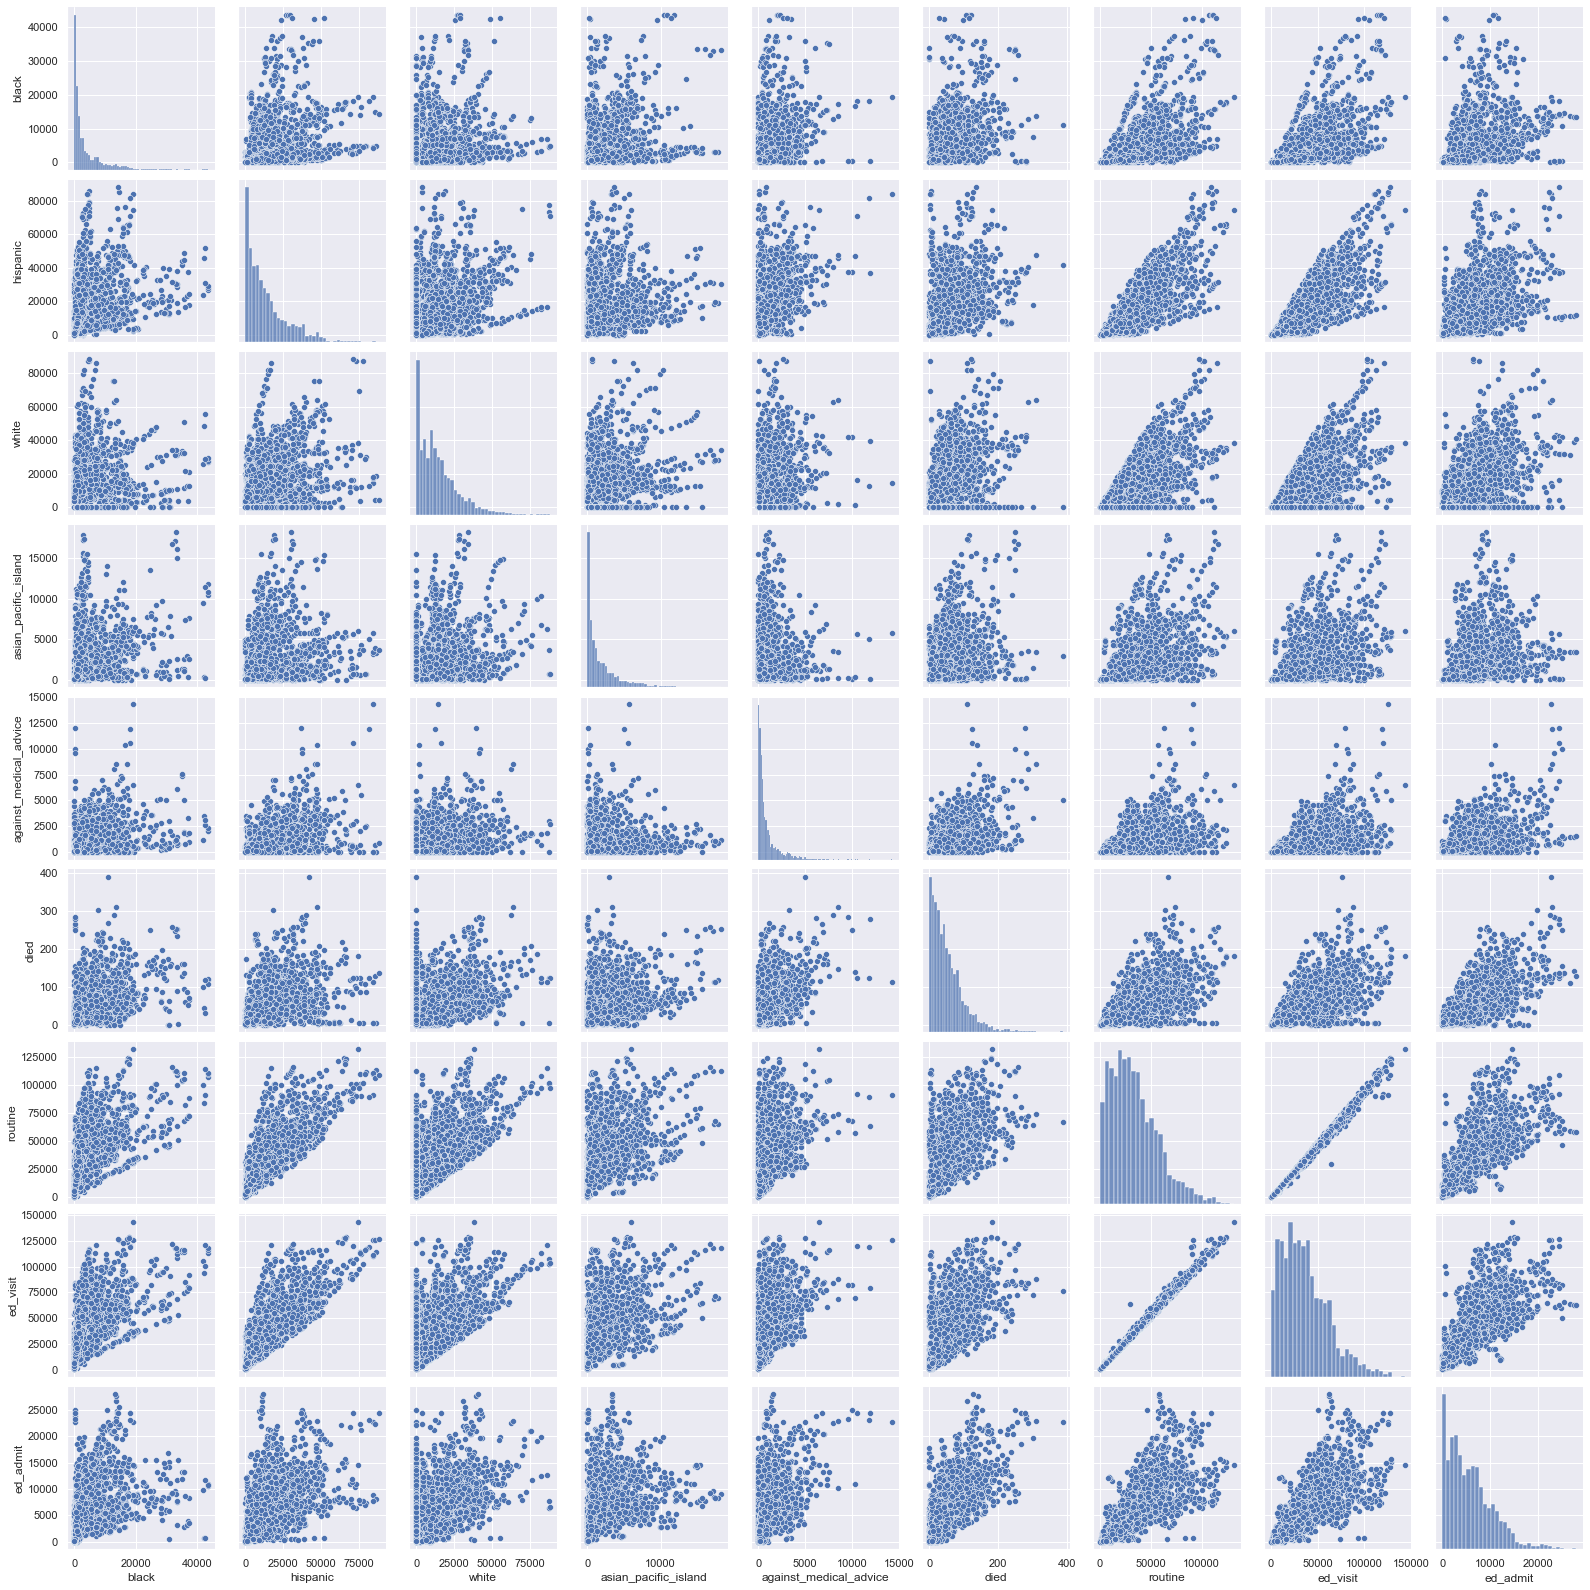

In [16]:
g = sns.pairplot(df[cols])

**Comment**

A. Distribution: all selected variables follow a right positive skew. 

B. Variables of interest:
1. *black*, *hispanic* and *white* variables: since there seems to be an interesting pattern related to ED visits and routine dispositions.
2. *died* and *routine* variables: these dispositions seem to have a higher associations among multiple race groups. 
3. *ED_visits*: looks like an interesting outcome variable, to be included in future regression analysis. 

# Step 6: Categorical Plots

In [18]:
np.unique(df['licensed_bed_size'].values)

array(['1-49', '100-149', '150-199', '200-299', '300-499', '50-99',
       '500+'], dtype=object)

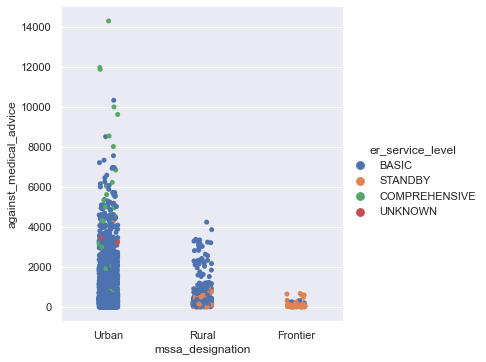

In [19]:

g = sns.catplot(x = "mssa_designation", y="against_medical_advice", hue = "er_service_level", 
                 data=df)

**Interpretation**

Based on the chart above, the MSSA designated, standby hospitals have smaller numbers of discharges against medical advice. There is high variation in the numbers for comprehensive urban hospitals.

In [141]:
# g = sns.catplot(x = "licensed_bed_size", y="against_medical_advice", hue = "mssa_designation", aspect = 1.5,
#                 order = ['1-49', '50-99', '100-149', '150-199', '200-299', '300-499','500+'], data=df)

## Step 7: Revisiting Initial Questions

In [ ]:
# Location and time related questions will be answered later.

**Initial Questions**

Note: Location and time related questions will be answered later
*The new dataset with ED visit and admissions contains data from 2012, that is why my timeline was updated.*

1. What are the trends in ED visits in each county since 2005?  Which year has the highest ED visits?
2. Where are the most ED visits recorded in California?
3. Where are the most English and Spanish speakers recorded?
4. What is the most common disposition in EDs? How about each county?
5. What are the trends in dispositions since 2005? 
6. Can any additional facility profiles/ flags be created for further analysis?



**Updated Questions**

1. What are the trends in ED visits in each county since 2012? 
5. What is the distribution of EDs based on race categories since 2012?
6. What are the trends in dispositions since 2012?


**New Questions**

7. Do *against medical advice* dispositions among *hispanic* patients differ from other race groups?
8. What are the trends in race groups compared to discharge profiles overtime?

<AxesSubplot:xlabel='licensed_bed_size', ylabel='ed_visit'>

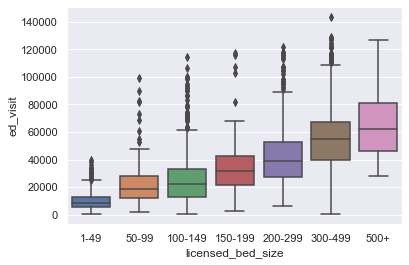

In [29]:
sns.boxplot(x='licensed_bed_size', y = 'ed_visit', data = df, 
           order = ['1-49', '50-99', '100-149', '150-199', '200-299', '300-499','500+'])

In [194]:
# 4.1 What are the median dispositions in EDs since 2012? 

disp = ['acute_care','against_medical_advice', 'died', 'hospice_care', 'home_health_service',
            'residential_care', 'routine', 'psychiatric_care', 'sn_ic_care']

df[disp].median().sort_values(ascending = False)

routine                   30320.0
against_medical_advice      461.0
acute_care                  405.0
psychiatric_care            161.0
sn_ic_care                   97.0
died                         41.0
home_health_service          19.0
hospice_care                  5.0
residential_care              3.0
dtype: float64

In [202]:
# 4.2 How about 2019 - 2020?
df_q4 = df.loc[df['year'].isin(['2020'])]

df_q4[disp].median().sort_values(ascending = False)

routine                   26045.0
against_medical_advice      479.0
acute_care                  418.5
psychiatric_care            202.5
sn_ic_care                  106.0
died                         47.0
home_health_service          20.0
hospice_care                  5.0
residential_care              4.0
dtype: float64

In [201]:
# 4.3:Additional? How about 2012 - 2013?
df_q4 = df.loc[df['year'].isin(['2015'])]

df_q4[disp].median().sort_values(ascending = False)

routine                   32294.0
against_medical_advice      457.5
acute_care                  358.0
psychiatric_care            164.0
sn_ic_care                   98.0
died                         40.0
home_health_service          21.0
hospice_care                  6.0
residential_care              4.0
dtype: float64

**Comment on question 4**

Overall the order of ranks between the dispositions have not changed since 2012. The average patient encounters for each disposition has also dropped since 2015. Later, the a graph will be plotted based on the moving average to visualize question 4 results better. 

# Step 8: Hypotheses

. If the number of *hispanic* patients increase, the number of "*routine*" dispositions will also increase.